<a href="https://colab.research.google.com/github/ErisonBarros/bookpython_ufpe/blob/master/Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Módulo básico de leitura e visualização de imagens**📡

In [8]:
!wget -P "https://github.com/ErisonBarros/bookpython_ufpe/blob/master/Dados_de_SR-20211112T010207Z-001/Dados_de_SR/Dados_de_SR-20211112T010207Z-001.zip"

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Copiar da web e copiar numa pasta do google

In [9]:
!wget -P "/content/drive/MyDrive/Colab Notebooks/Dados_de_SR" https://github.com/ErisonBarros/bookpython_ufpe/blob/master/Dados_de_SR-20211112T010207Z-001/Dados_de_SR/Dados_de_SR-20211112T010207Z-001.zip

--2021-11-13 01:19:14--  https://github.com/ErisonBarros/bookpython_ufpe/blob/master/Dados_de_SR-20211112T010207Z-001/Dados_de_SR/Dados_de_SR-20211112T010207Z-001.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
/content/drive/MyDrive/Colab Notebooks/Dados_de_SR/Dados_de_SR-20211112T010207Z-001.zip: Read-only file system

Cannot write to ‘/content/drive/MyDrive/Colab Notebooks/Dados_de_SR/Dados_de_SR-20211112T010207Z-001.zip’ (Success).


# Extraindo dados

/content/Imagens Satetiles/Dados_de_SR-20211112T010207Z-001.zip/Dados_de_SR-20211112T010207Z-001.zip

In [10]:
! unzip /content/drive/MyDrive/Colab Notebooks/Dados_de_SR

unzip:  cannot find or open /content/drive/MyDrive/Colab, /content/drive/MyDrive/Colab.zip or /content/drive/MyDrive/Colab.ZIP.


# Instalando libs não nativas do Colab

In [11]:
!pip install spectral
!pip install rasterio
!pip install earthpy

     |████████████████████████████████| 212 kB 5.0 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 1.0 MB 43.2 MB/s 
     |████████████████████████████████| 6.3 MB 35.9 MB/s 
     |████████████████████████████████| 15.4 MB 23 kB/s 


# Tifffile

In [12]:
import glob
import tifffile as tif
import matplotlib.pyplot as plt
from spectral import imshow, save_rgb
import numpy as np

In [13]:
b1 = tif.imread('/content/drive/MyDrive/Colab Notebooks/Dados_de_SR/L71221071_07120010720_DN_1.tif')
b2 = tif.imread('/content/drive/MyDrive/Colab Notebooks/Dados_de_SR/L71221071_07120010720_DN_2.tif')
b3 = tif.imread('/content/drive/MyDrive/Colab Notebooks/Dados_de_SR/L71221071_07120010720_DN_3.tif')
b4 = tif.imread('/content/drive/MyDrive/Colab Notebooks/Dados_de_SR/L71221071_07120010720_DN_4.tif')
b5 = tif.imread('/content/drive/MyDrive/Colab Notebooks/Dados_de_SR/L71221071_07120010720_DN_5.tif')
b7 = tif.imread('/content/drive/MyDrive/Colab Notebooks/Dados_de_SR/L71221071_07120010720_DN_7.tif')

In [29]:
stack_tif = np.dstack([b1,b2,b3,b4,b5,b7])

In [30]:
bandas_tif = []
for i in sorted(glob.glob('/content/Dados de SR/*.tif')):
  bandas_tif.append(tif.imread(i))
  stack_tif = np.dstack(bandas_tif)

In [31]:
stack_tif.shape

(1233, 1520, 6)

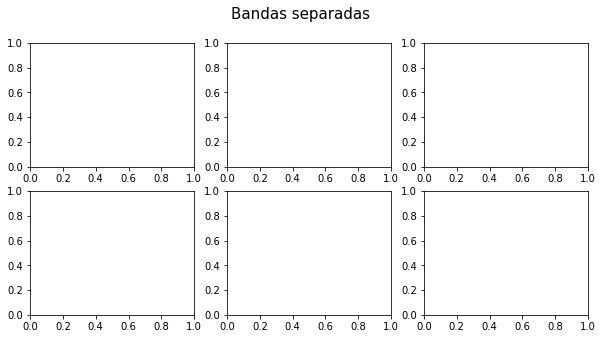

In [33]:
band_names = ['Blue', 'Green', 'Red', 'NIR', 'SWIR-1','SWIR-2']
fig,axes = plt.subplots(2,3,figsize=(10,5)) 
fig.suptitle('Bandas separadas', fontsize=15) 
axes = axes.ravel() 
for i in range(len(bandas_tif)): 
  axes[i].imshow(stack_tif[:,:,i],cmap='gray') 
  axes[i].set_title(band_names[i],fontsize=10) 
  axes[i].axis('off')

ImageView object:
  Display bands       :  (0, 2, 3)
  Interpolation       :  <default>
  RGB data limits     :
    R: [40.0, 255.0]
    G: [4.0, 255.0]
    B: [12.0, 255.0]

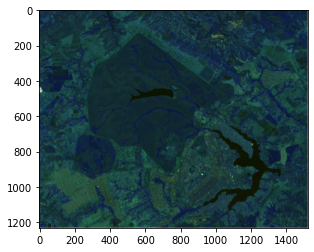

In [36]:
imshow(stack_tif, bands=(0,2,3))

# Rasterio

In [37]:
import rasterio
from  rasterio.plot import show

In [38]:
rst = rasterio.open('/content/drive/MyDrive/Colab Notebooks/Dados_de_SR/Cubo_SR.tif')

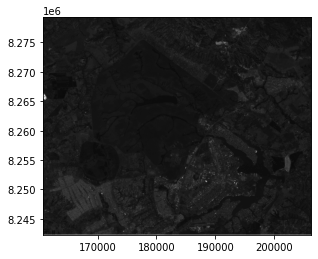

In [40]:
show(rst, cmap='Greys_r')

In [41]:
rst

<open DatasetReader name='/content/drive/MyDrive/Colab Notebooks/Dados_de_SR/Cubo_SR.tif' mode='r'>

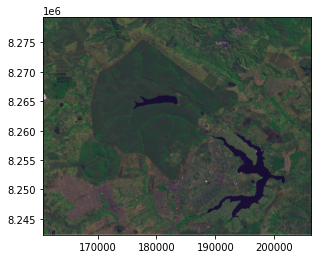

In [42]:
#show(rst)
show(rst.read([3,4,1]), transform=rst.transform)

In [44]:
with rasterio.open('/content/drive/MyDrive/Colab Notebooks/Dados_de_SR/Cubo_SR.tif') as rst:
  b1_rst = rst.read(1)
  b2_rst = rst.read(2)
  b4_rst = rst.read(4)

stack_rst = np.dstack([b1_rst,b2_rst,b4_rst])

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [40.0, 255.0]
    G: [13.0, 255.0]
    B: [12.0, 255.0]

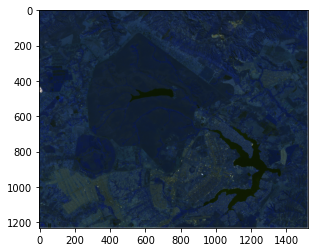

In [45]:
imshow(stack_rst)

# Earthpy

In [46]:
import earthpy.spatial as es
import earthpy.plot as ep

In [49]:
bandas_ep = []

for i in sorted(glob.glob('/content/drive/MyDrive/Colab Notebooks/Dados_de_SR/*.tif')):
  bandas_ep.append(i)
  

In [59]:
stack_ep, meta_data = es.stack(bandas_ep)

/usr/local/lib/python3.7/dist-packages/earthpy/spatial.py:333: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(stacked_arr), ret_prof


In [60]:
ep.plot_bands(stack_ep, title=band_names)
plt.show()

In [61]:
ep.plot_rgb(stack_ep, rgb=(2,3,0), stretch = False)

ValueError: ignored

# Histogramas

In [58]:
ep.hist(stack_ep, bins = 200, title=band_names)
plt.show()

ValueError: ignored

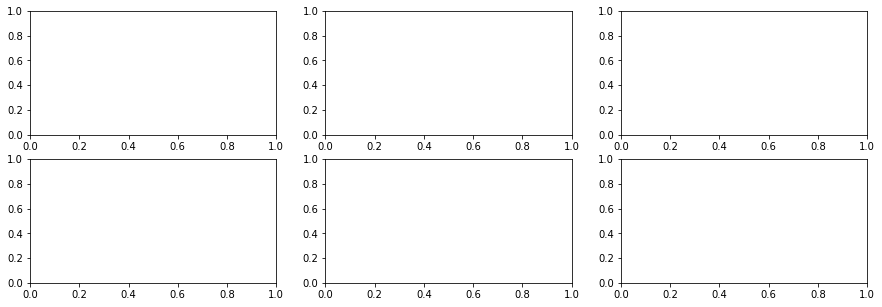

In [62]:
fig2,axes2 = plt.subplots(2,3,figsize=(15,5)) 
axes2 = axes2.ravel() 
for i in range(len(bandas_tif)): 
  axes2[i].hist(stack_tif2[:,:,i].flatten(),bins = 200) 
  axes2[i].set_title(band_names[i],fontsize=10) 

In [63]:
save_rgb('B1.tif',stack_tif2[:,:,0], stretch=(0.02,0.98))

NameError: ignored

In [ ]:
B1 = tif.imread('B1.tif')

In [ ]:
plt.hist(B1.flatten(), bins=200)
plt.show()

In [ ]:
plt.hist(stack_tif2[:,:,0].flatten(), bins=200)
plt.show()

**Obrigado!!!**😊